<a href="https://colab.research.google.com/github/Danielrcnn/Redes-Neurais/blob/master/ExoPlanets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Para executar: ## 
  # Primeramente, deve-se pegar o seu Token (kaggle.json):
    # Logado em seu perfil do Kaggle, vá em "Account" e procure por API, após achar, clique em "Create Nem API Token";
    # Após baixar seu Token, upe ele aqui.
  # Pronto, só executar a rede.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os #Import do Drive
from numpy import genfromtxt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, minmax_scale
from sklearn.metrics import accuracy_score

In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d keplersmachines/kepler-labelled-time-series-data

 95% 53.0M/55.9M [00:01<00:00, 32.9MB/s]
100% 55.9M/55.9M [00:01<00:00, 44.5MB/s]


In [17]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [18]:
Train_data = pd.read_csv('exoTrain.csv', sep=',', header=None, skiprows=1, low_memory=False) #.drop(0)
Test_data = pd.read_csv('exoTest.csv', sep=',', header=None, skiprows=1, low_memory=False) #header=None, skiprows=1
Train_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167,3168,3169,3170,3171,3172,3173,3174,3175,3176,3177,3178,3179,3180,3181,3182,3183,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
Test_data.head()

In [19]:
dataset = Train_data.values
Validacao = Test_data.values

X = dataset[:,1:3198].astype('float')

X1 = Validacao[:,1:3198].astype('float')
# print(X)

Y = dataset[:,0].astype('int')

Y1 = Validacao[:,0].astype('int')
# print(Y)

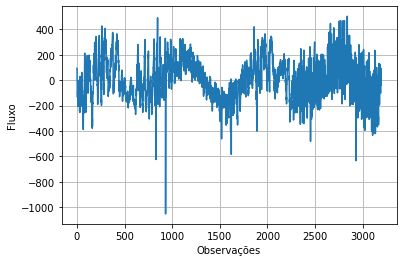

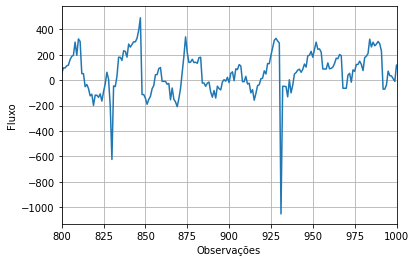

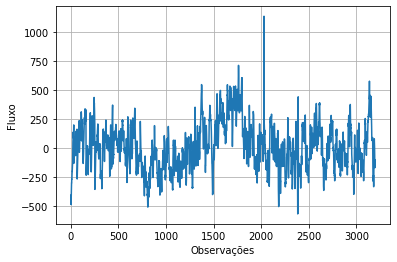

In [20]:
#Fluxo de luminosidade total da Estrela 1 (Posição 0) do conjunto de treinamento
plt.plot(X[0,:])
plt.grid()
plt.xlabel('Observações')
plt.ylabel('Fluxo')
plt.show()

#Fluxo de um possível trânsito planetário (Intervalo do Fluxo: 800 a 1000) do conjunto de treinamento
plt.xlim(800,1000)
plt.plot(X[0,:])
plt.grid()
plt.xlabel('Observações')
plt.ylabel('Fluxo')
plt.show()

#Fluxo de luminosidade total da Estrela 3197 (Posição 3196) sem exoplaneta confirmado
plt.plot(X[3196,:])
plt.grid()
plt.xlabel('Observações')
plt.ylabel('Fluxo')
plt.show()

In [21]:
# # Normalização de dados de Entrada

# scalerX = MinMaxScaler(feature_range=(-1,1))
# scalerX.fit(X)
# XTrain_Norm = scalerX.transform(X)
# XTest_Norm = scalerX.transform(X1)
# print(XTest_Norm)

# sklearn.preprocessing.minmax_scale(X, feature_range=0, 1, *, axis=0, copy=True)

# # Normalização de dados de Saída

adsda = LabelEncoder()
fff = LabelEncoder()
Norm_Dados_Train_Out = adsda.fit_transform(Y)
Norm_Dados_Test_Out = fff.fit_transform(Y1)
print(Norm_Dados_Test_Out)

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [22]:
Modelo = Sequential()
Modelo.add(Dense(500))
Modelo.add(Activation('tanh'))
Modelo.add(Dense(1))

Modelo.compile(optimizer='adam', loss='mean_squared_error',  metrics=['accuracy'])
# Modelo.compile(optimizer= adam(1e-5), loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
# Treinamento_da_Rede = Modelo.fit(X, Y, epochs=100, validation_data=(X1, Y1))
Treinamento_da_Rede = Modelo.fit(X, Norm_Dados_Train_Out, epochs=100, validation_data=(X1, Norm_Dados_Test_Out))
# Treinamento_da_Rede = Modelo.fit(XTrain_Norm, Norm_Dados_Train_Out, epochs=100, validation_data=(XTest_Norm, Norm_Dados_Test_Out))

Epoch 1/100
159/159 [==============================] - 4s 19ms/step - loss: 1.5388 - accuracy: 0.6895 - val_loss: 0.3970 - val_accuracy: 0.8211
Epoch 2/100
159/159 [==============================] - 4s 28ms/step - loss: 0.3031 - accuracy: 0.8210 - val_loss: 0.1789 - val_accuracy: 0.8702
Epoch 3/100
159/159 [==============================] - 5s 32ms/step - loss: 0.1053 - accuracy: 0.9340 - val_loss: 0.0926 - val_accuracy: 0.9474
Epoch 4/100
159/159 [==============================] - 3s 21ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0473 - val_accuracy: 0.9895
Epoch 5/100
159/159 [==============================] - 3s 18ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0303 - val_accuracy: 0.9912
Epoch 6/100
159/159 [==============================] - 3s 17ms/step - loss: 0.0135 - accuracy: 0.9933 - val_loss: 0.0216 - val_accuracy: 0.9912
Epoch 7/100
159/159 [==============================] - 3s 17ms/step - loss: 0.0103 - accuracy: 0.9924 - val_loss: 0.0170 - val_accuracy:

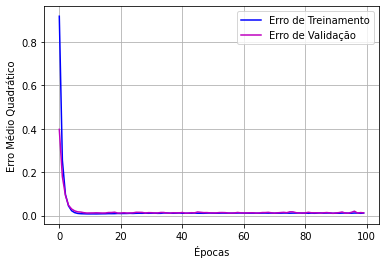

In [24]:
plt.plot(Treinamento_da_Rede.history['loss'], "-b", label="Erro de Treinamento")
plt.plot(Treinamento_da_Rede.history['val_loss'], "-m", label="Erro de Validação")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Quadrático')
plt.show()

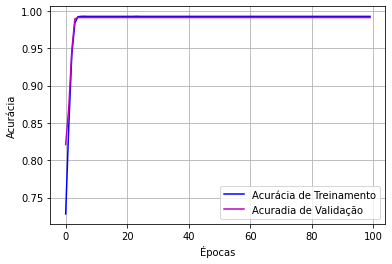

In [25]:
plt.plot(Treinamento_da_Rede.history['accuracy'], "-b", label="Acurácia de Treinamento")
plt.plot(Treinamento_da_Rede.history['val_accuracy'], "-m", label="Acuradia de Validação")
plt.grid()
plt.legend(loc="lower right")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.show()

In [26]:
# test_loss, test_acc = Modelo.evaluate(XTrain_Norm, Norm_Dados_Train_Out, verbose=2)
test_loss, test_acc = Modelo.evaluate(X, Norm_Dados_Train_Out, verbose=2)
# test_loss, test_acc = Modelo.evaluate(X, Y, verbose=2)
print('\nTest accuracy:', test_acc)

159/159 - 1s - loss: 0.0104 - accuracy: 0.9927

Test accuracy: 0.9927265644073486


In [27]:
# YPrediction = Modelo.predict(XTrain_Norm)
YPrediction = Modelo.predict(X)

In [28]:
# Error = mean_squared_error(Y, YPrediction)
Error = mean_squared_error(Norm_Dados_Train_Out, YPrediction)
print('Raiz do erro médio quadratico: %.3f' % np.sqrt(Error))

Raiz do erro médio quadratico: 0.102


In [ ]:
# ypred = Norm_Dados_Train_Out.inverse_transform(Y)